In [2]:
import data_processing as dp

dacha_file = 'digital_dacha_data_2024.csv'
population_file = 'Population.csv'

df = dp.process_data(dacha_file, population_file)

# Grand Junction
Wage_Expert_GJ = 4_500
Wage_Staff_GJ = 1_160
pop_estimate_GJ = 69_412
med_inc_estimate_GJ = 62_993

recdf_GJ = dp.calculate_recommended_staffing(df, Wage_Expert_GJ, Wage_Staff_GJ, pop_estimate_GJ, med_inc_estimate_GJ, Contribution_Margin=100, Rev=1000)

# St. George
Wage_Expert_SJ = 4_500
Wage_Staff_SJ = 2_000
pop_estimate_SJ = 104_578
med_inc_estimate_SJ = 69_333

recdf_SJ = dp.calculate_recommended_staffing(df, Wage_Expert_SJ, Wage_Staff_SJ, pop_estimate_SJ, med_inc_estimate_SJ, Contribution_Margin=100, Rev=1000)



In [6]:
recdf_GJ

,Month,RecExperts,RecStaff,Quantity,Revenue,GrossProfit,EmpWages
0,1.0,5.647509,13.857023,1113.230840,1.113231e+06,111323.084033,41487.935375
1,2.0,6.720925,16.490815,1324.821642,1.324822e+06,132482.164239,49373.510638
2,3.0,7.167022,17.585381,1412.755702,1.412756e+06,141275.570179,52650.640959
3,4.0,7.031835,17.253679,1386.107738,1.386108e+06,138610.773799,51657.523482
4,5.0,7.207505,17.684713,1420.735757,1.420736e+06,142073.575677,52948.041996
5,6.0,7.077309,17.365258,1395.071658,1.395072e+06,139507.165754,51991.591227
6,7.0,6.911047,16.957308,1362.298197,1.362298e+06,136229.819682,50770.188464
7,8.0,7.060355,17.323658,1391.729628,1.391730e+06,139172.962803,51867.040325
8,9.0,7.396862,18.149330,1458.061605,1.458062e+06,145806.160522,54339.103358
9,10.0,7.658632,18.791621,1509.661292,1.509661e+06,150966.129246,56262.122728


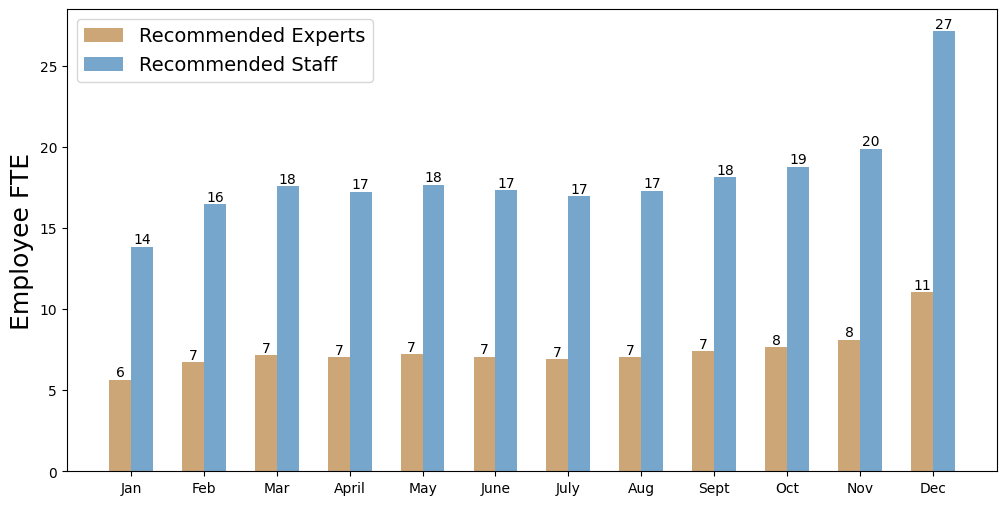

In [ ]:
import matplotlib.pyplot as plt

# Define the DataFrame
df_to_use = recdf_GJ

# Create the bar plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar([m - 0.15 for m in df_to_use['Month']], df_to_use['RecExperts'], width=0.3, label='Recommended Experts', color='#cca677')
bars2 = plt.bar([m + 0.15 for m in df_to_use['Month']], df_to_use['RecStaff'], width=0.3, label='Recommended Staff', color='#77a6cc')

# Adding labels and title
plt.ylabel('Employee FTE', fontsize = 18)

# Month dictionary
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Convert the month numbers to month names
month_names = [month_dict[m] for m in df_to_use['Month']]

# Set the x-ticks to the month names
plt.xticks(df_to_use['Month'], month_names)

# Add the numbers on top of the bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height)}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height)}', ha='center', va='bottom', fontsize=10)

# Show legend with updated labels
plt.legend(fontsize = 14)

# Display the plot
plt.show()


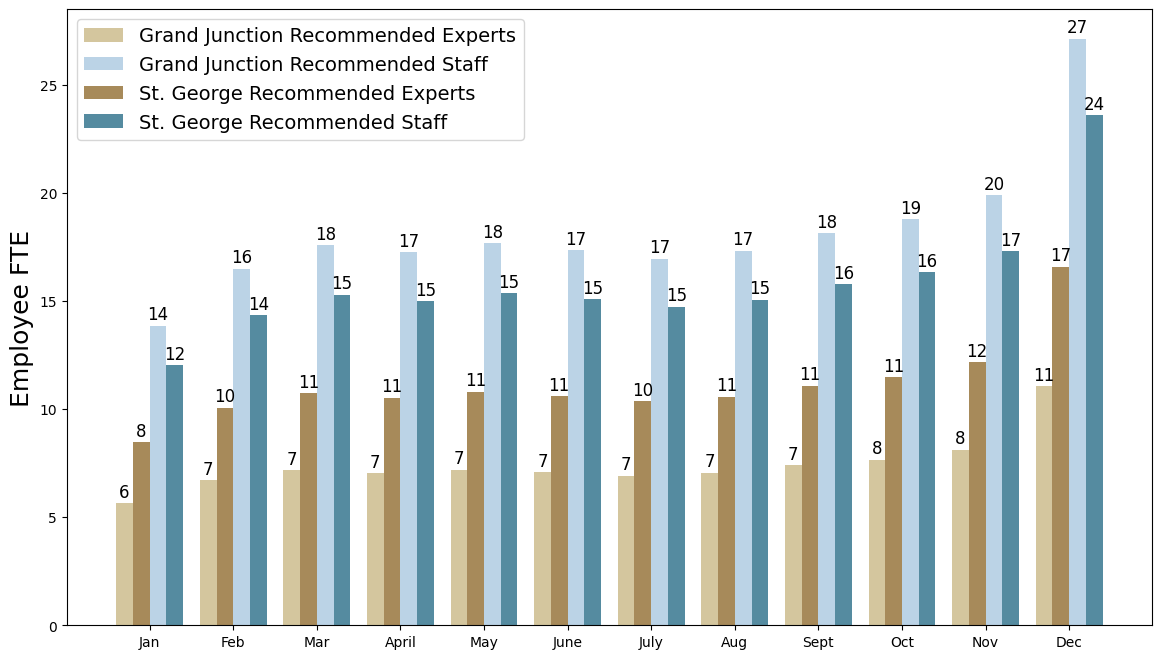

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df_1 = recdf_GJ  # Grand Junction
df_2 = recdf_SJ  # St. George

# Create the figure and axes
plt.figure(figsize=(14, 8))

# Set the width for each bar
bar_width = 0.2

# Create x-ticks for each month (1-12)
months = np.arange(1, 13)

# Define the position of the bars for each dataset
x_1 = months - bar_width  # Shift bars to the left
x_2 = months + bar_width  # Shift bars to the right

# Define the colors for df_1
color_experts = '#d4c69e'  # Lighter color for Experts in df_1
color_staff = '#bbd3e6'    # Lighter color for Staff in df_1

# Define the darker shades for df_2
color_experts_darker = '#a78a5a'  # Darker shade for Experts in df_2
color_staff_darker = '#558ba0'    # Darker shade for Staff in df_2

# Create bars for df_1 (Recommended Experts and Recommended Staff)
bars1_1 = plt.bar(x_1 - bar_width/2, df_1['RecExperts'], width=bar_width, label='Grand Junction Recommended Experts', color=color_experts)
bars2_1 = plt.bar(x_2 - bar_width/2, df_1['RecStaff'], width=bar_width, label='Grand Junction Recommended Staff', color=color_staff)

# Create bars for df_2 (Recommended Experts and Recommended Staff)
bars1_2 = plt.bar(x_1 + bar_width/2, df_2['RecExperts'], width=bar_width, label='St. George Recommended Experts', color=color_experts_darker)
bars2_2 = plt.bar(x_2 + bar_width/2, df_2['RecStaff'], width=bar_width, label='St. George Recommended Staff', color=color_staff_darker)

# Adding labels and title
plt.ylabel('Employee FTE', fontsize=18)

# Month dictionary
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Convert the month numbers to month names
month_names = [month_dict[m] for m in months]

# Set the x-ticks to the month names
plt.xticks(months, month_names)

# Add the numbers on top of the bars (rounded to nearest whole number)
for bar in bars1_1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{round(height)}', ha='center', va='bottom', fontsize=12, color='black')

for bar in bars2_1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{round(height)}', ha='center', va='bottom', fontsize=12, color='black')

for bar in bars1_2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{round(height)}', ha='center', va='bottom', fontsize=12, color='black')

for bar in bars2_2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{round(height)}', ha='center', va='bottom', fontsize=12, color='black')

# Show legend with updated labels
plt.legend(fontsize=14)

# Display the plot
plt.show()


In [3]:
dp.calculate_net_income(recdf_GJ)

601264.2491769423
